In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
dataset = pd.read_csv('NewSl.csv')
dataset.head()

Date  Month  Year   RF  T max   T min  Avg_tem
0     1     10  2013  0.0    31.1   25.8    28.45
1     2     10  2013  0.0    31.3   27.5    29.40
2     3     10  2013  1.6    31.3   27.3    29.30
3     4     10  2013  5.8    30.7   25.7    28.20
4     5     10  2013  0.3    30.8   24.4    27.60

In [71]:
dataset_mod1 = dataset[['RF']]
dataset_mod1.head()

RF
0  0.0
1  0.0
2  1.6
3  5.8
4  0.3

In [72]:
training_set = dataset_mod1.iloc[0:365,0]

training_set

0       0.0
1       0.0
2       1.6
3       5.8
4       0.3
       ... 
360    32.9
361     0.2
362     1.3
363    30.6
364    22.5
Name: RF, Length: 365, dtype: float64

In [73]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [74]:
training_set = training_set.values.reshape(len(training_set), 1)
training_set

array([[0.000e+00],
       [0.000e+00],
       [1.600e+00],
       [5.800e+00],
       [3.000e-01],
       [2.500e+00],
       [1.320e+01],
       [0.000e+00],
       [3.400e+00],
       [6.200e+00],
       [5.500e+00],
       [2.000e+00],
       [4.000e-01],
       [1.600e+00],
       [0.000e+00],
       [2.460e+01],
       [2.100e+00],
       [1.820e+01],
       [2.370e+01],
       [1.000e-01],
       [8.100e+00],
       [1.600e+00],
       [5.000e-01],
       [1.900e+00],
       [0.000e+00],
       [1.200e+00],
       [0.000e+00],
       [0.000e+00],
       [5.000e-01],
       [7.100e+00],
       [8.200e+00],
       [9.200e+00],
       [1.800e+01],
       [2.800e+00],
       [3.100e+00],
       [3.000e+00],
       [0.000e+00],
       [5.100e+00],
       [3.500e+00],
       [2.120e+01],
       [8.800e+00],
       [0.000e+00],
       [3.000e-01],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [1.970e+01],


In [75]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.55642023e-02],
       [5.64202335e-02],
       [2.91828794e-03],
       [2.43190661e-02],
       [1.28404669e-01],
       [0.00000000e+00],
       [3.30739300e-02],
       [6.03112840e-02],
       [5.35019455e-02],
       [1.94552529e-02],
       [3.89105058e-03],
       [1.55642023e-02],
       [0.00000000e+00],
       [2.39299611e-01],
       [2.04280156e-02],
       [1.77042802e-01],
       [2.30544747e-01],
       [9.72762646e-04],
       [7.87937743e-02],
       [1.55642023e-02],
       [4.86381323e-03],
       [1.84824903e-02],
       [0.00000000e+00],
       [1.16731518e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.86381323e-03],
       [6.90661479e-02],
       [7.97665370e-02],
       [8.94941634e-02],
       [1.75097276e-01],
       [2.72373541e-02],
       [3.01556420e-02],
       [2.91828794e-02],
       [0.00000000e+00],
       [4.96108949e-02],
       [3.40466926e-02],
       [2.06225681e-01],


In [76]:
x_train = []
y_train = []
n_future = 5 # next 4 days temperature forecast
n_past = 100 # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [77]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [78]:
from keras.layers import LSTM,Dense ,Dropout
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs for more info.

In [79]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True), input_shape = (x_train.shape[1],1) ) )
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
history = regressor.fit(x_train, y_train, epochs=500,batch_size=32,validation_split=0.20 )

print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Epoch 1/500
7/7 [==============================] - 8s 282ms/step - loss: 0.0155 - acc: 0.1731 - val_loss: 0.0182 - val_acc: 0.2264
Epoch 2/500
7/7 [==============================] - 0s 62ms/step - loss: 0.0145 - acc: 0.1971 - val_loss: 0.0171 - val_acc: 0.1698
Epoch 3/500
7/7 [==============================] - 0s 69ms/step - loss: 0.0143 - acc: 0.1923 - val_loss: 0.0165 - val_acc: 0.2453
Epoch 4/500
7/7 [==============================] - 0s 61ms/step - loss: 0.0143 - acc: 0.2404 - val_loss: 0.0169 - val_acc: 0.1698
Epoch 5/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0142 - acc: 0.2596 - val_loss: 0.0170 - val_acc: 0.1698
Epoch 6/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0144 - acc: 0.2212 - val_loss: 0.0173 - val_acc: 0.1321
Epoch 7/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0143 - acc: 0.2115 - val_loss: 0.0167 - val_acc: 0.2264
Epoch 8/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0144 - acc: 0.2

7/7 [==============================] - 0s 62ms/step - loss: 0.0139 - acc: 0.2933 - val_loss: 0.0176 - val_acc: 0.2075
Epoch 64/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0138 - acc: 0.2981 - val_loss: 0.0173 - val_acc: 0.2075
Epoch 65/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0139 - acc: 0.2356 - val_loss: 0.0176 - val_acc: 0.1887
Epoch 66/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0139 - acc: 0.2692 - val_loss: 0.0179 - val_acc: 0.2642
Epoch 67/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0138 - acc: 0.2019 - val_loss: 0.0179 - val_acc: 0.2642
Epoch 68/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0138 - acc: 0.2548 - val_loss: 0.0176 - val_acc: 0.2264
Epoch 69/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0138 - acc: 0.2692 - val_loss: 0.0178 - val_acc: 0.2642
Epoch 70/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0138 - acc: 0.2404 - 

7/7 [==============================] - 0s 62ms/step - loss: 0.0120 - acc: 0.2500 - val_loss: 0.0160 - val_acc: 0.2830
Epoch 126/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0117 - acc: 0.2308 - val_loss: 0.0184 - val_acc: 0.2075
Epoch 127/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0117 - acc: 0.2596 - val_loss: 0.0188 - val_acc: 0.2075
Epoch 128/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0112 - acc: 0.3221 - val_loss: 0.0207 - val_acc: 0.1887
Epoch 129/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0112 - acc: 0.2452 - val_loss: 0.0190 - val_acc: 0.3396
Epoch 130/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0126 - acc: 0.2404 - val_loss: 0.0162 - val_acc: 0.2642
Epoch 131/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0127 - acc: 0.3317 - val_loss: 0.0161 - val_acc: 0.3019
Epoch 132/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0120 - acc: 0.

7/7 [==============================] - 0s 63ms/step - loss: 0.0122 - acc: 0.1875 - val_loss: 0.0195 - val_acc: 0.2453
Epoch 188/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0123 - acc: 0.2404 - val_loss: 0.0191 - val_acc: 0.2453
Epoch 189/500
7/7 [==============================] - 0s 61ms/step - loss: 0.0114 - acc: 0.2548 - val_loss: 0.0192 - val_acc: 0.2264
Epoch 190/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0108 - acc: 0.3317 - val_loss: 0.0208 - val_acc: 0.2075
Epoch 191/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0098 - acc: 0.3125 - val_loss: 0.0231 - val_acc: 0.1887
Epoch 192/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0099 - acc: 0.2740 - val_loss: 0.0224 - val_acc: 0.2453
Epoch 193/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0094 - acc: 0.3029 - val_loss: 0.0203 - val_acc: 0.2264
Epoch 194/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0090 - acc: 0.

7/7 [==============================] - 0s 63ms/step - loss: 0.0071 - acc: 0.3894 - val_loss: 0.0206 - val_acc: 0.2264
Epoch 250/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0076 - acc: 0.3750 - val_loss: 0.0198 - val_acc: 0.2075
Epoch 251/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0081 - acc: 0.3221 - val_loss: 0.0184 - val_acc: 0.2453
Epoch 252/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0098 - acc: 0.2788 - val_loss: 0.0186 - val_acc: 0.1698
Epoch 253/500
7/7 [==============================] - 0s 61ms/step - loss: 0.0089 - acc: 0.3317 - val_loss: 0.0189 - val_acc: 0.2264
Epoch 254/500
7/7 [==============================] - 0s 62ms/step - loss: 0.0086 - acc: 0.3173 - val_loss: 0.0197 - val_acc: 0.1887
Epoch 255/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0076 - acc: 0.3462 - val_loss: 0.0192 - val_acc: 0.2075
Epoch 256/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0073 - acc: 0.

7/7 [==============================] - 0s 65ms/step - loss: 0.0093 - acc: 0.3558 - val_loss: 0.0181 - val_acc: 0.2264
Epoch 312/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0081 - acc: 0.4038 - val_loss: 0.0202 - val_acc: 0.2830
Epoch 313/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0070 - acc: 0.3317 - val_loss: 0.0207 - val_acc: 0.3019
Epoch 314/500
7/7 [==============================] - 0s 61ms/step - loss: 0.0066 - acc: 0.3317 - val_loss: 0.0219 - val_acc: 0.2264
Epoch 315/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0068 - acc: 0.3029 - val_loss: 0.0217 - val_acc: 0.3019
Epoch 316/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0085 - acc: 0.3413 - val_loss: 0.0194 - val_acc: 0.3585
Epoch 317/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0077 - acc: 0.3365 - val_loss: 0.0203 - val_acc: 0.2453
Epoch 318/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0067 - acc: 0.

7/7 [==============================] - 0s 64ms/step - loss: 0.0059 - acc: 0.3413 - val_loss: 0.0243 - val_acc: 0.2075
Epoch 374/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0059 - acc: 0.4135 - val_loss: 0.0257 - val_acc: 0.2453
Epoch 375/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0054 - acc: 0.3365 - val_loss: 0.0247 - val_acc: 0.2075
Epoch 376/500
7/7 [==============================] - 0s 62ms/step - loss: 0.0053 - acc: 0.3942 - val_loss: 0.0246 - val_acc: 0.2075
Epoch 377/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0063 - acc: 0.3317 - val_loss: 0.0231 - val_acc: 0.2264
Epoch 378/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0071 - acc: 0.3317 - val_loss: 0.0244 - val_acc: 0.2075
Epoch 379/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0065 - acc: 0.3077 - val_loss: 0.0252 - val_acc: 0.1887
Epoch 380/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0055 - acc: 0.

7/7 [==============================] - 0s 68ms/step - loss: 0.0058 - acc: 0.3173 - val_loss: 0.0235 - val_acc: 0.2264
Epoch 436/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0072 - acc: 0.3798 - val_loss: 0.0250 - val_acc: 0.2075
Epoch 437/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0055 - acc: 0.4038 - val_loss: 0.0243 - val_acc: 0.2075
Epoch 438/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0063 - acc: 0.3942 - val_loss: 0.0229 - val_acc: 0.1887
Epoch 439/500
7/7 [==============================] - 0s 66ms/step - loss: 0.0063 - acc: 0.3317 - val_loss: 0.0251 - val_acc: 0.1698
Epoch 440/500
7/7 [==============================] - 0s 64ms/step - loss: 0.0055 - acc: 0.3173 - val_loss: 0.0277 - val_acc: 0.1887
Epoch 441/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0054 - acc: 0.3798 - val_loss: 0.0236 - val_acc: 0.2075
Epoch 442/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0056 - acc: 0.

7/7 [==============================] - 0s 64ms/step - loss: 0.0051 - acc: 0.4135 - val_loss: 0.0232 - val_acc: 0.2075
Epoch 498/500
7/7 [==============================] - 0s 63ms/step - loss: 0.0046 - acc: 0.3221 - val_loss: 0.0255 - val_acc: 0.2075
Epoch 499/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0042 - acc: 0.4087 - val_loss: 0.0277 - val_acc: 0.1887
Epoch 500/500
7/7 [==============================] - 0s 65ms/step - loss: 0.0049 - acc: 0.4279 - val_loss: 0.0254 - val_acc: 0.2453
[0.015526952221989632, 0.014453122392296791, 0.014319981448352337, 0.01428883709013462, 0.014216238632798195, 0.014352023601531982, 0.014275903813540936, 0.01436410378664732, 0.014325881376862526, 0.014331376180052757, 0.014245057478547096, 0.014251760207116604, 0.014412145130336285, 0.014246066100895405, 0.014302343130111694, 0.014197045005857944, 0.014276186935603619, 0.014296179637312889, 0.01426456868648529, 0.014192508533596992, 0.014214914292097092, 0.014238204807043076, 0.01

In [85]:
# read test dataset
testdataset = pd.read_csv('NewSl.csv')
#get only the temperature column
testdataset = testdataset.iloc[0:100,3:4]
testdataset

RF
0   0.0
1   0.0
2   1.6
3   5.8
4   0.3
..  ...
95  0.0
96  0.0
97  7.4
98  0.0
99  0.0

[100 rows x 1 columns]

In [86]:
real_temperature = pd.read_csv('NewSl.csv')
real_temperature = real_temperature.iloc[100:105,3:4]

real_temperature = real_temperature.values.reshape(len(real_temperature), 1)
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

C:\Users\Sevindu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [87]:
real_temperature

array([[58.1],
       [ 0. ],
       [ 0. ],
       [ 3.8],
       [ 0. ]])

In [88]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

1/1 [==============================] - 1s 1s/step


In [89]:
predicted_temperature

array([[59.53018  ],
       [ 2.730783 ],
       [ 1.9943453],
       [ 2.7888517],
       [ 1.0274433]], dtype=float32)

In [90]:
from matplotlib import pyplot

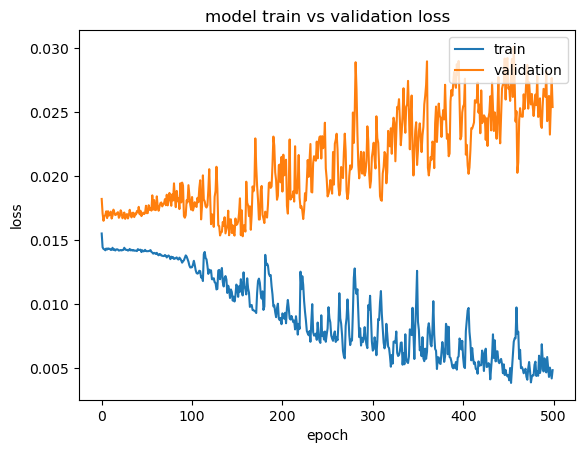

In [91]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [92]:
RT = real_temperature
PT = predicted_temperature

In [93]:
model_MSE= (    (   ((PT[0]-RT[0])**2) + ((PT[1]-RT[1])**2) + ((PT[2]-RT[2])**2) + ((PT[3]-RT[3])**2)    )/4 ) 

model_MSE

array([3.62560749])